In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

sns.set_theme()

In [2]:
walmart = pd.read_csv('data/walmart.csv')
amazon = pd.read_csv('data/amazon.csv')

In [3]:
print(walmart.shape)
walmart.head()

(30000, 14)


,Uniq Id,Crawl Timestamp,Product Url,Product Name,Description,List Price,Sale Price,Brand,Item Number,Gtin,Package Size,Category,Postal Code,Available
0,019b67ef7f01103d8fb0a53e4c36daa7,2019-12-18 10:20:52 +0000,https://www.walmart.com/ip/La-Costena-Chipotle...,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,31.93,31.93,La Costeï¿½ï¿½a,NaN,139941530,NaN,"Food | Meal Solutions, Grains & Pasta | Canned...",NaN,True
1,3a4ff306dcc8a6e2bf720964d29b84c3,2019-12-18 17:21:48 +0000,https://www.walmart.com/ip/Equate-Triamcinolon...,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,10.48,10.48,Equate,569045548.0,632775553,NaN,Health | Equate | Equate Allergy | Equate Sinu...,NaN,True
2,80090549d7d176327b186353c7b28ca4,2019-12-18 17:46:41 +0000,https://www.walmart.com/ip/AduroSmart-ERIA-Sof...,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,10.99,10.99,AduroSmart ERIA,568068849.0,281487005,NaN,Electronics | Smart Home | Smart Energy and Li...,NaN,True
3,151ee1c61a29bacfedb01cd500494b2f,2019-12-18 22:14:22 +0000,https://www.walmart.com/ip/24-Classic-Adjustab...,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,38.59,38.59,lowrider,NaN,133714060,NaN,Sports & Outdoors | Bikes | Bike Accessories |...,NaN,True
4,7b2ef8d41f65df121f6b4b9828cf8dad,2019-12-18 06:56:02 +0000,https://www.walmart.com/ip/Elephant-Shape-Sili...,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,5.81,5.81,Anself,NaN,104042139,NaN,Baby | Feeding | Sippy Cups: Alternatives to P...,NaN,True


In [4]:
print(amazon.shape)
amazon.head()

(10002, 28)


,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [5]:
print(f'Walmart Cols: {list(walmart.columns)}')
print()
print(f'Amazon Cols: {list(amazon.columns)}')

Walmart Cols: ['Uniq Id', 'Crawl Timestamp', 'Product Url', 'Product Name', 'Description', 'List Price', 'Sale Price', 'Brand', 'Item Number', 'Gtin', 'Package Size', 'Category', 'Postal Code', 'Available']

Amazon Cols: ['Uniq Id', 'Product Name', 'Brand Name', 'Asin', 'Category', 'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity', 'Model Number', 'About Product', 'Product Specification', 'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image', 'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details', 'Dimensions', 'Color', 'Ingredients', 'Direction To Use', 'Is Amazon Seller', 'Size Quantity Variant', 'Product Description']


In [6]:
walmart.isna().mean(axis=0)

Uniq Id            0.000000
Crawl Timestamp    0.000000
Product Url        0.000000
Product Name       0.000000
Description        0.001767
List Price         0.000000
Sale Price         0.000000
Brand              0.018800
Item Number        0.704167
Gtin               0.000000
Package Size       1.000000
Category           0.000567
Postal Code        1.000000
Available          0.000000
dtype: float64

In [7]:
amazon.isna().mean(axis=0)

Uniq Id                  0.000000
Product Name             0.000000
Brand Name               1.000000
Asin                     1.000000
Category                 0.082983
Upc Ean Code             0.996601
List Price               1.000000
Selling Price            0.010698
Quantity                 1.000000
Model Number             0.177165
About Product            0.027295
Product Specification    0.163167
Technical Details        0.078984
Shipping Weight          0.113777
Product Dimensions       0.952110
Image                    0.000000
Variants                 0.752250
Sku                      1.000000
Product Url              0.000000
Stock                    1.000000
Product Details          1.000000
Dimensions               1.000000
Color                    1.000000
Ingredients              1.000000
Direction To Use         1.000000
Is Amazon Seller         0.000000
Size Quantity Variant    1.000000
Product Description      1.000000
dtype: float64

In [8]:
walmart = walmart[['Product Name', 'Sale Price', 'Brand', 'Category']]
amazon = amazon[['Product Name', 'Brand Name', 'Category', 'Selling Price']]

walmart.iloc[1:6]

,Product Name,Sale Price,Brand,Category
1,Equate Triamcinolone Acetonide Nasal Allergy S...,10.48,Equate,Health | Equate | Equate Allergy | Equate Sinu...
2,AduroSmart ERIA Soft White Smart A19 Light Bul...,10.99,AduroSmart ERIA,Electronics | Smart Home | Smart Energy and Li...
3,"24"" Classic Adjustable Balloon Fender Set Chro...",38.59,lowrider,Sports & Outdoors | Bikes | Bike Accessories |...
4,Elephant Shape Silicone Drinkware Portable Sil...,5.81,Anself,Baby | Feeding | Sippy Cups: Alternatives to P...
5,(6 Boxes) Twinings of London Nightly Calm Gree...,17.99,Twinings,Food | Beverages | Tea | All Tea


In [9]:
amazon.head()

,Product Name,Brand Name,Category,Selling Price
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,Sports & Outdoors | Outdoor Recreation | Skate...,$237.68
1,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,Toys & Games | Learning & Education | Science ...,$99.95
2,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,Toys & Games | Arts & Crafts | Craft Kits,$34.99
3,Guillow Airplane Design Studio with Travel Cas...,NaN,Toys & Games | Hobbies | Models & Model Kits |...,$28.91
4,Woodstock- Collage 500 pc Puzzle,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,$17.49


In [10]:
extract_primary_category = lambda s: s.split(' | ')[0] if not pd.isna(s) else np.nan
walmart['Primary Category'] = walmart['Category'].apply(extract_primary_category)
amazon['Primary Category'] = amazon['Category'].apply(extract_primary_category)

In [11]:
walmart['Primary Category']

0                     Food
1                   Health
2              Electronics
3        Sports & Outdoors
4                     Baby
               ...        
29995                 Food
29996    Sports & Outdoors
29997                 Food
29998               Beauty
29999               Beauty
Name: Primary Category, Length: 30000, dtype: object

In [12]:
amazon['Primary Category']

0        Sports & Outdoors
1             Toys & Games
2             Toys & Games
3             Toys & Games
4             Toys & Games
               ...        
9997          Toys & Games
9998          Toys & Games
9999       Office Products
10000         Toys & Games
10001       Home & Kitchen
Name: Primary Category, Length: 10002, dtype: object

In [13]:
walmart = walmart.drop(columns=['Category'])
amazon = amazon.drop(columns=['Category'])

In [14]:
walmart.isna().mean(axis=0)

Product Name        0.000000
Sale Price          0.000000
Brand               0.018800
Primary Category    0.000567
dtype: float64

In [15]:
amazon.isna().mean(axis=0)

Product Name        0.000000
Brand Name          1.000000
Selling Price       0.010698
Primary Category    0.082983
dtype: float64

In [16]:
walmart = walmart.drop(columns=['Brand'])
amazon = amazon.drop(columns=['Brand Name'])

In [17]:
walmart[walmart['Primary Category'].isna()]

,Product Name,Sale Price,Primary Category
3927,3 Stories Trading Company 6 Pack Boxed Receivi...,26.09,NaN
5868,Speed Racer Boomerangs RH (Blue)Colorado Boome...,16.95,NaN
6443,Mobile Equipment Box,159.99,NaN
9068,Ultra Pro Magic: The Gathering Battebond Playmat,10.98,NaN
10449,Blood is Thicker than water- Family Runion you...,14.99,NaN
10671,adidas Kids Nemeziz 19.3 Indoor Soccer Shoes |...,60.00,NaN
13435,"HERCHR Toy Bell Holder, Baby Crib Mobile Bed B...",26.74,NaN
14749,Bike Helmet Foldable Cycling Helmet Adult Road...,36.12,NaN
15946,"Butterfinger Bites Chocolate Candy, 3.5oz Thea...",5.28,NaN
16538,Hawaii Lavender Hand Cleansing Sanitizer from ...,9.99,NaN


In [18]:
17/30000

0.0005666666666666667

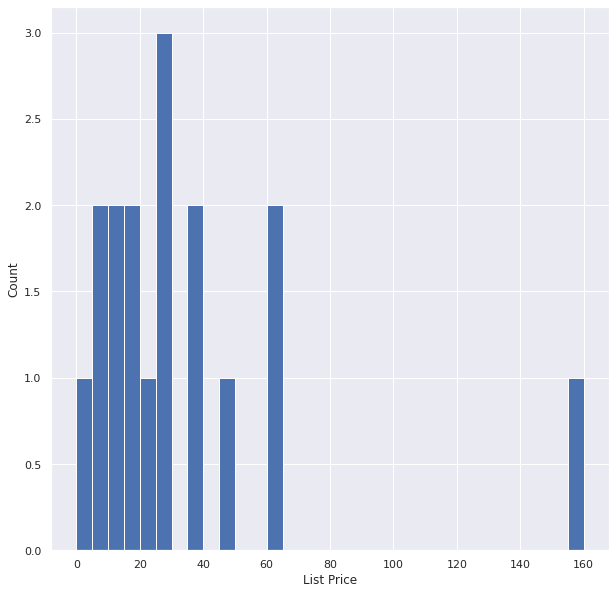

In [19]:
plt.figure(figsize=(10, 10))
plt.hist(walmart[walmart['Primary Category'].isna()]['Sale Price'], bins=np.arange(0, 165, 5))
plt.xlabel('List Price')
plt.ylabel('Count')
plt.show()

In [20]:
amazon.isna().mean(axis=0)

Product Name        0.000000
Selling Price       0.010698
Primary Category    0.082983
dtype: float64

In [21]:
def extract_price(s):
    if pd.isna(s):
        return np.nan
    
    s = s.replace('$', '').replace(',', '')
    if ' - ' in s:
        s1, s2 = s.split(' - ')
        s = (float(s1) + float(s2)) / 2
        return s
    try:
        return float(s)
    except:
        return np.nan

In [22]:
walmart.iloc[1:6]

,Product Name,Sale Price,Primary Category
1,Equate Triamcinolone Acetonide Nasal Allergy S...,10.48,Health
2,AduroSmart ERIA Soft White Smart A19 Light Bul...,10.99,Electronics
3,"24"" Classic Adjustable Balloon Fender Set Chro...",38.59,Sports & Outdoors
4,Elephant Shape Silicone Drinkware Portable Sil...,5.81,Baby
5,(6 Boxes) Twinings of London Nightly Calm Gree...,17.99,Food


In [23]:
amazon['Selling Price'] = amazon['Selling Price'].apply(extract_price)
amazon.head()

,Product Name,Selling Price,Primary Category
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,Sports & Outdoors
1,"Electronic Snap Circuits Mini Kits Classpack, ...",99.95,Toys & Games
2,3Doodler Create Flexy 3D Printing Filament Ref...,34.99,Toys & Games
3,Guillow Airplane Design Studio with Travel Cas...,28.91,Toys & Games
4,Woodstock- Collage 500 pc Puzzle,17.49,Toys & Games


In [24]:
amazon['Selling Price'].isna().mean()

0.026294741051789642

In [25]:
amazon = amazon.drop(amazon[amazon['Selling Price'].isna()].index)
amazon.shape

(9739, 3)

In [26]:
amazon[amazon['Primary Category'].isna()]

,Product Name,Selling Price,Primary Category
5,"Terra by Battat – 4 Dinosaur Toys, Medium – Di...",18.66,NaN
9,Pokemon TCG: Sun and Moon Crimson Invasion Eli...,38.49,NaN
40,Funko Pop! Games: Persona 5 - The Joker (Style...,15.45,NaN
50,"LAMO 5"" Vinyl Figure - Legacy Gamers Dr Disres...",19.50,NaN
56,"Wild Republic Mermaid Toy, Slap Bracelet, Gift...",7.99,NaN
...,...,...,...
9876,"NPW Drinking Buddies Money Shooter, It's Raini...",14.82,NaN
9877,Banpresto 39655 My Hero Academia Age of Heroes...,34.99,NaN
9884,Li'l Woodzeez Bakery Playset – Tickle-Your-Tas...,33.39,NaN
9936,"Fisher-Price Nickelodeon Sunny Day, Sunny Styl...",34.06,NaN


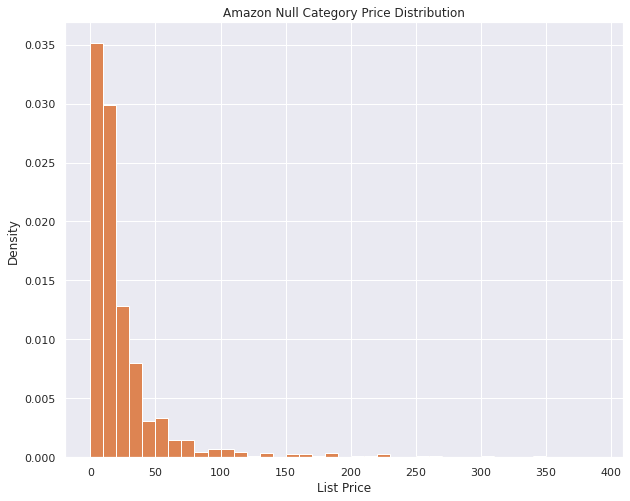

In [27]:
plt.figure(figsize=(10, 8))
plt.hist(amazon[amazon['Primary Category'].isna()]['Selling Price'], bins=np.arange(0, 400, 10), density=True, color=sns.color_palette()[1])
plt.xlabel('List Price')
plt.ylabel('Density')
plt.title('Amazon Null Category Price Distribution')
plt.savefig('amazon_na.png')
plt.show()

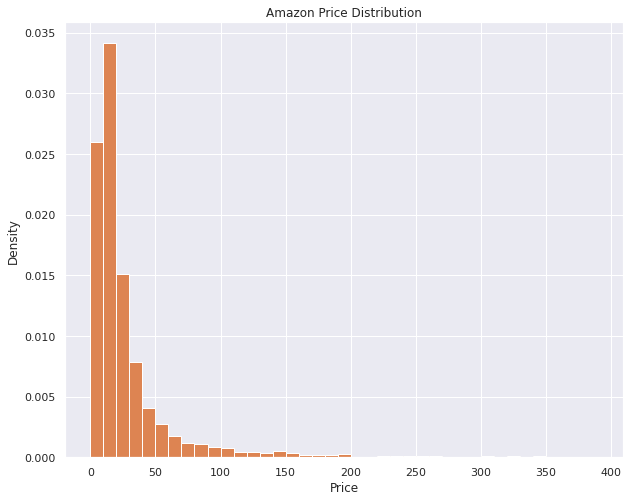

In [28]:
plt.figure(figsize=(10, 8))
plt.hist(amazon['Selling Price'], bins=np.arange(0, 400, 10), alpha=1, density=True, label='Amazon', color=sns.color_palette()[1])
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Amazon Price Distribution')
plt.savefig('amazon_dist.png')
plt.show()

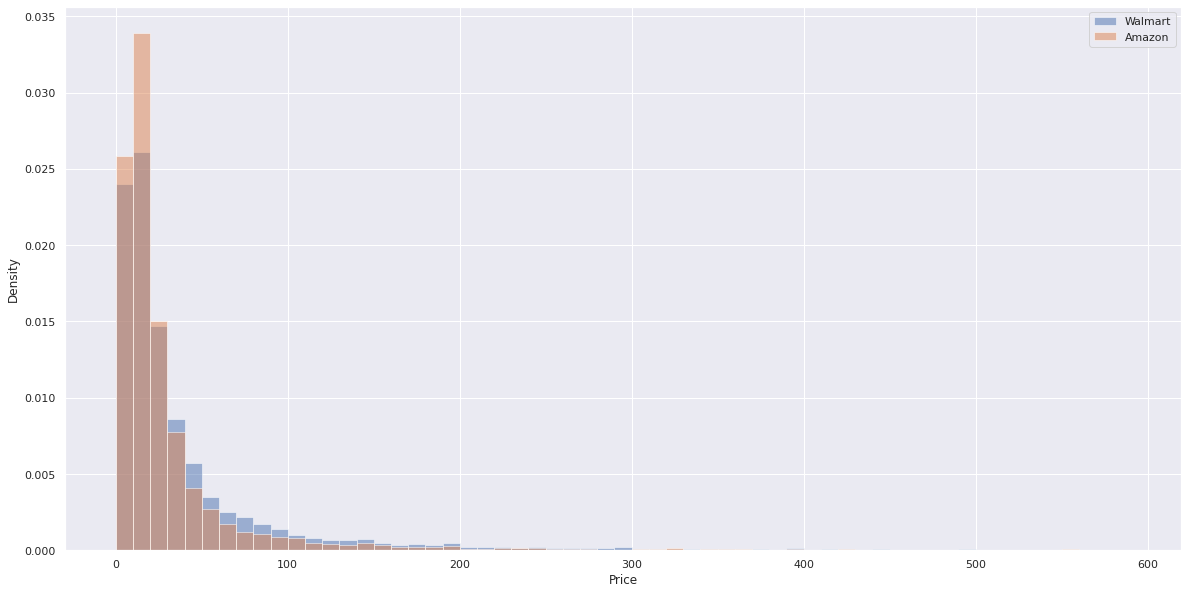

In [29]:
plt.figure(figsize=(20, 10))
plt.hist(walmart['Sale Price'], bins=np.arange(0, 600, 10), alpha=0.5, density=True, label='Walmart')
plt.hist(amazon['Selling Price'], bins=np.arange(0, 600, 10), alpha=0.5, density=True, label='Amazon')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.savefig('hist.png')
plt.show()

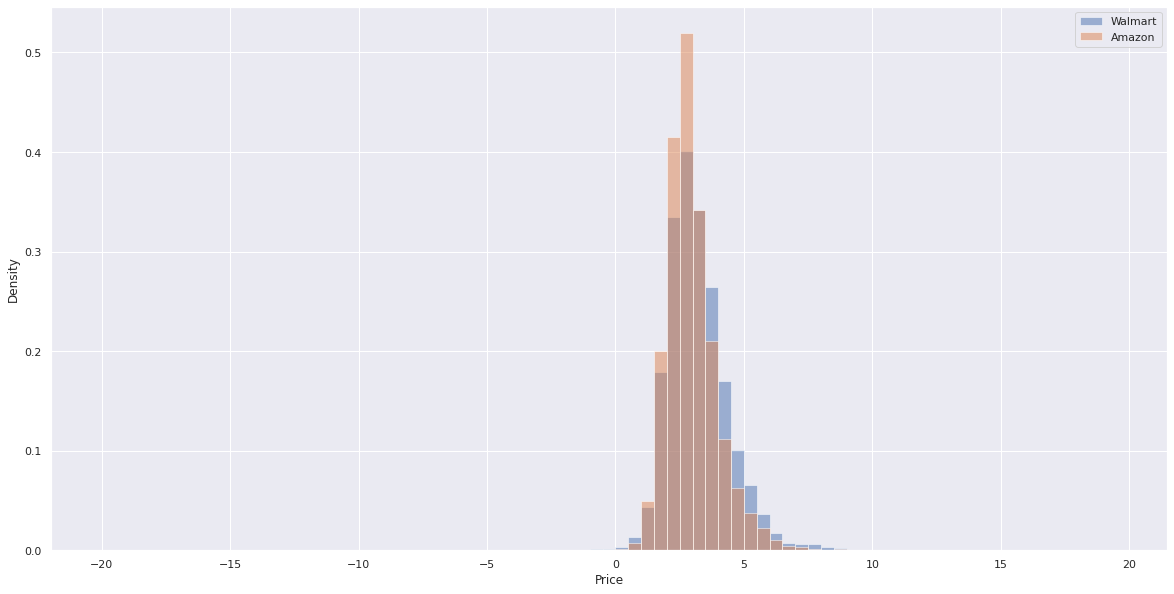

In [30]:
plt.figure(figsize=(20, 10))
plt.hist(np.log(walmart['Sale Price'] + 10**-9), alpha=0.5, density=True, label='Walmart', bins=np.arange(-20, 20, 0.5))
plt.hist(np.log(amazon['Selling Price'] + 10**-9), alpha=0.5, density=True, label='Amazon', bins=np.arange(-20, 20, 0.5))
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

In [31]:
def generate_cdf(walmart_ser, amazon_ser, xlim=False, path=None):
    max_val = max(int(walmart_ser.max()), int(amazon_ser.max()))
    cdf_vals_wal = []
    cdf_vals_ama = []
    
    for i in np.arange(0, max_val + 1, 0.5):
        cdf_vals_wal.append((walmart_ser <= i).mean())
        cdf_vals_ama.append((amazon_ser <= i).mean())
        
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))

    axs[0].plot(np.arange(0, max_val + 1, 0.5), cdf_vals_wal, label='Walmart')
    axs[0].plot(np.arange(0, max_val + 1, 0.5), cdf_vals_ama, label='Amazon')
    axs[0].set_xlabel('Prices')
    axs[0].set_ylabel('CDF')
    axs[0].set_xlim(0, max_val)
    axs[0].legend()
    
    axs[1].plot(np.arange(0, max_val + 1, 0.5), cdf_vals_wal, label='Walmart')
    axs[1].plot(np.arange(0, max_val + 1, 0.5), cdf_vals_ama, label='Amazon')
    axs[1].set_xlabel('Prices')
    axs[1].set_ylabel('CDF')
    axs[1].set_xlim(0, max_val)
    axs[1].legend()
    
    if path:
        plt.savefig(path)

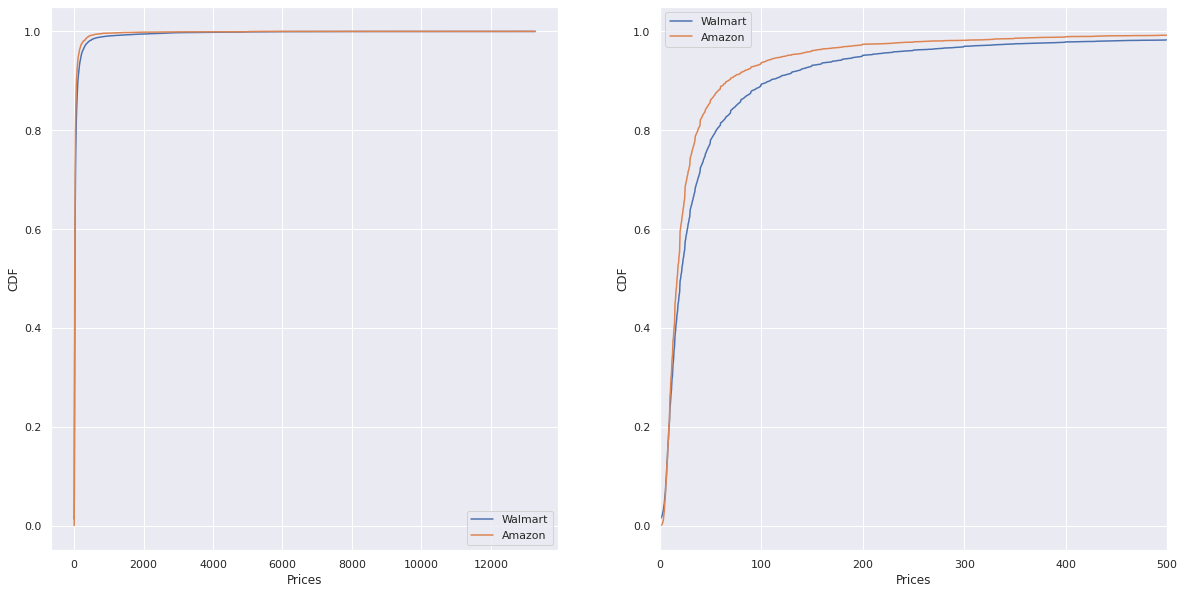

In [32]:
generate_cdf(walmart['Sale Price'], amazon['Selling Price'], path='cdfs.png')

In [33]:
walmart['Primary Category'].value_counts()

Primary Category
Sports & Outdoors          11038
Food                        4140
Health                      3924
Baby                        2754
Personal Care               2313
Household Essentials        1970
Toys                         870
Beauty                       808
Home                         476
Clothing                     446
Premium Beauty               413
Shop by Brand                158
Patio & Garden               120
Home Improvement             110
Auto & Tires                  76
Party & Occasions             75
Pets                          74
Electronics                   56
Seasonal                      44
Industrial & Scientific       30
Feature                       15
Books                         14
Video Games                   12
Jewelry                        8
Arts Crafts & Sewing           8
Walmart for Business           7
Office Supplies                5
Character Shop                 5
Cell Phones                    4
Shop by Movie             

In [34]:
amazon['Primary Category'].value_counts()

Primary Category
Toys & Games                                6509
Home & Kitchen                               683
Clothing, Shoes & Jewelry                    626
Sports & Outdoors                            483
Baby Products                                211
Arts, Crafts & Sewing                        120
Office Products                               75
Hobbies                                       34
Industrial & Scientific                       28
Health & Household                            23
Remote & App Controlled Vehicle Parts         22
Remote & App Controlled Vehicles & Parts      17
Tools & Home Improvement                      16
Pet Supplies                                  14
Patio, Lawn & Garden                          12
Grocery & Gourmet Food                        11
Beauty & Personal Care                        11
Automotive                                     9
Electronics                                    7
Video Games                                    4
Mus

In [35]:
walmart_categories_to_keep = ['Sports & Outdoors', 'Health', 'Household Essentials', 'Home', 'Baby', 'Toys', 'Home Improvement', 'Clothing', 'Jewelry']
amazon_categories_to_keep = ['Toys & Games', 'Home & Kitchen', 'Clothing, Shoes & Jewelry', 'Sports & Outdoors', 'Baby Products', 'Health & Household']

In [36]:
walmart = walmart[walmart['Primary Category'].isin(walmart_categories_to_keep)]
amazon = amazon[amazon['Primary Category'].isin(amazon_categories_to_keep)]

In [37]:
amazon['Primary Category'].unique()

array(['Sports & Outdoors', 'Toys & Games', 'Clothing, Shoes & Jewelry',
       'Home & Kitchen', 'Baby Products', 'Health & Household'],
      dtype=object)

In [38]:
def universalize_walmart(category):
    if category in ['Health', 'Household Essentials', 'Home', 'Home Improvement']:
        return 'Health & Household'
    if category in ['Clothing', "Jewelry"]:
        return 'Clothing, Shoes & Jewelry'
    return category

def universalize_amazon(category):
    if category in ['Home & Kitchen', 'Health & Household']:
        return 'Health & Household'
    if category == 'Baby Products':
        return 'Baby'
    if category == 'Toys & Games':
        return 'Toys'
    return category

walmart['Universal Category'] = walmart['Primary Category'].apply(universalize_walmart)
amazon['Universal Category'] = amazon['Primary Category'].apply(universalize_amazon)

In [39]:
walmart_vcs = walmart['Universal Category'].value_counts(normalize=True)
walmart['Universal Category'].value_counts()

Universal Category
Sports & Outdoors            11038
Health & Household            6480
Baby                          2754
Toys                           870
Clothing, Shoes & Jewelry      454
Name: count, dtype: int64

In [40]:
amazon_vcs = amazon['Universal Category'].value_counts(normalize=True)
amazon['Universal Category'].value_counts()

Universal Category
Toys                         6509
Health & Household            706
Clothing, Shoes & Jewelry     626
Sports & Outdoors             483
Baby                          211
Name: count, dtype: int64

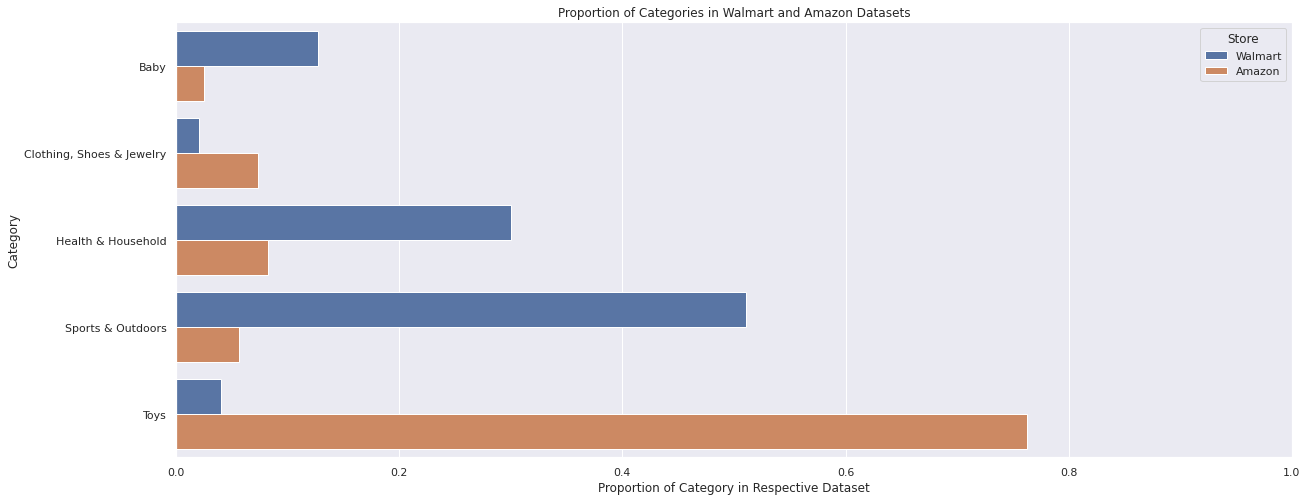

In [41]:
plot_df = pd.DataFrame({'Walmart': walmart_vcs, 'Amazon': amazon_vcs})

plot_df = plot_df.reset_index()
plot_df_melted = plot_df.melt(id_vars='Universal Category', var_name='Store', value_name='Count')

plt.figure(figsize=(20, 8))
sns.barplot(data=plot_df_melted, x='Count', y='Universal Category', hue='Store')
plt.title('Proportion of Categories in Walmart and Amazon Datasets')
plt.xlabel('Proportion of Category in Respective Dataset')
plt.ylabel('Category')
plt.xlim(0, 1)
plt.savefig('category_dist.png')
plt.show()

In [42]:
walmart['Sale Price'].describe()

count    21596.000000
mean        87.115107
std        367.840686
min          0.000000
25%         11.960000
50%         23.220000
75%         52.242500
max      13280.810000
Name: Sale Price, dtype: float64

In [43]:
amazon['Selling Price'].describe()

count    8535.000000
mean       44.715483
std       189.450614
min         0.010000
25%        10.205000
50%        17.570000
75%        31.645000
max      5332.000000
Name: Selling Price, dtype: float64

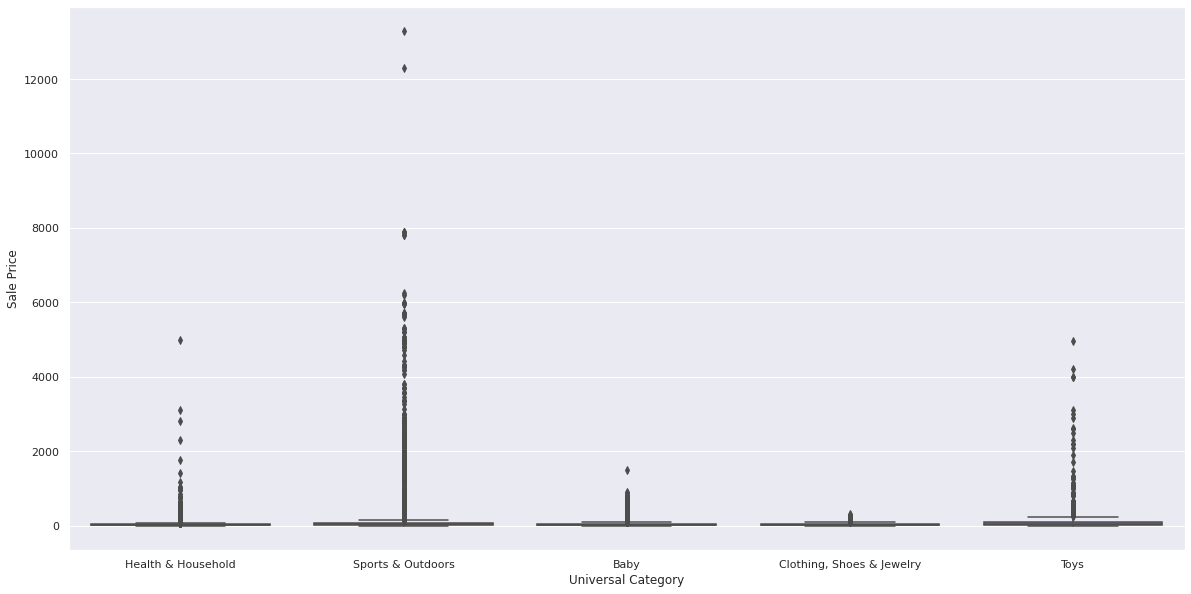

In [44]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=walmart, x='Universal Category', y='Sale Price')
plt.show()

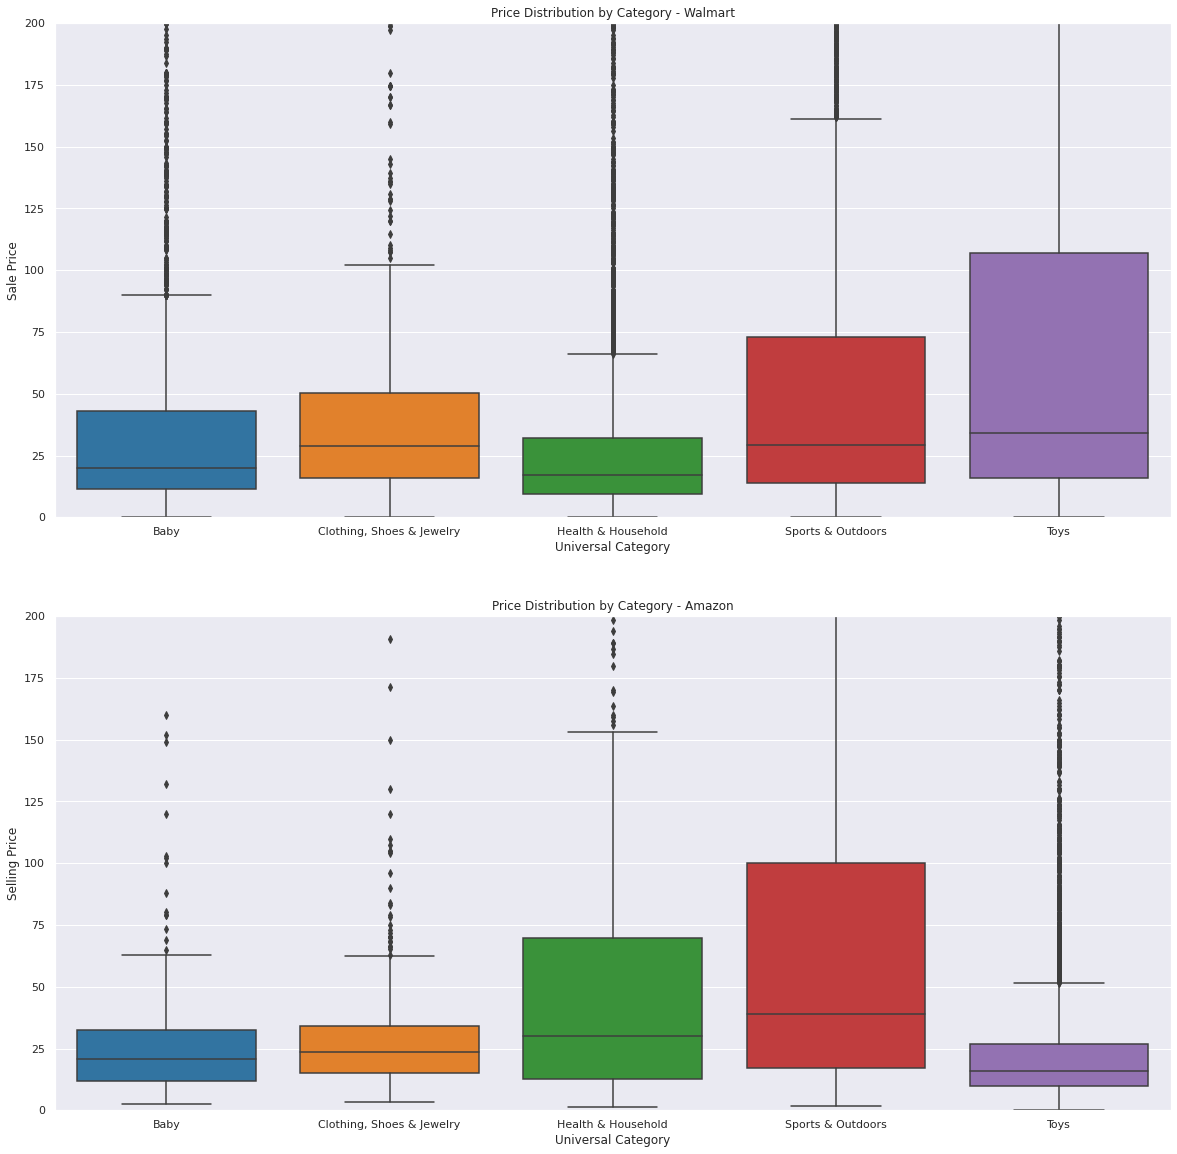

In [45]:
walmart['Universal Category'] = pd.Categorical(walmart['Universal Category'])
amazon['Universal Category'] = pd.Categorical(amazon['Universal Category'])

categories = sorted(walmart['Universal Category'].unique())
walmart['Universal Category'] = walmart['Universal Category'].cat.reorder_categories(categories)
amazon['Universal Category'] = amazon['Universal Category'].cat.reorder_categories(categories)

palette = sns.color_palette("tab10", len(categories))

color_dict = dict(zip(categories, palette))

fig, axs = plt.subplots(2, figsize=(20, 20))

sns.boxplot(data=walmart, x='Universal Category', y='Sale Price', ax=axs[0], palette=color_dict)
axs[0].set_ylim(0, 200)
axs[0].set_title('Price Distribution by Category - Walmart')

sns.boxplot(data=amazon, x='Universal Category', y='Selling Price', ax=axs[1], palette=color_dict)
axs[1].set_ylim(0, 200)
axs[1].set_title('Price Distribution by Category - Amazon')

plt.savefig('bp.png')
plt.show()

In [46]:
for cat in walmart['Universal Category'].unique():
    walmart_prop = (walmart[walmart['Universal Category'] == cat]['Sale Price'] >= 600)
    amazon_prop = (amazon[amazon['Universal Category'] == cat]['Selling Price'] >= 600)
    print()
    print(f'Walmart - {cat} < {1000}: {walmart_prop.mean()}, {walmart_prop.sum()}')
    print(f'Amazon - {cat} < {1000}: {amazon_prop.mean()}, {amazon_prop.sum()}')


Walmart - Health & Household < 1000: 0.0033950617283950617, 22
Amazon - Health & Household < 1000: 0.024079320113314446, 17

Walmart - Sports & Outdoors < 1000: 0.028175394093132813, 311
Amazon - Sports & Outdoors < 1000: 0.026915113871635612, 13

Walmart - Baby < 1000: 0.0054466230936819175, 15
Amazon - Baby < 1000: 0.0, 0

Walmart - Clothing, Shoes & Jewelry < 1000: 0.0, 0
Amazon - Clothing, Shoes & Jewelry < 1000: 0.0, 0

Walmart - Toys < 1000: 0.05517241379310345, 48
Amazon - Toys < 1000: 0.003994469196497158, 26


In [47]:
walmart_outlier_lims = {}
amazon_outlier_lims = {}

iqr_mult = 3.5
for cat in walmart['Universal Category'].unique():
    walmart_pr = (walmart[walmart['Universal Category'] == cat]['Sale Price'])
    amazon_pr = (amazon[amazon['Universal Category'] == cat]['Selling Price'])
    
    walmart_limit = (walmart_pr.quantile(0.75) - walmart_pr.quantile(0.25)) * iqr_mult
    amazon_limit = (amazon_pr.quantile(0.75) - amazon_pr.quantile(0.25)) * iqr_mult
    
    walmart_outlier_lims[cat] = walmart_limit
    amazon_outlier_lims[cat] = amazon_limit
    
    walmart_prop = walmart_pr > walmart_limit
    amazon_prop = amazon_pr > amazon_limit
    
    print()
    print(f'Walmart - {cat} < {walmart_limit.round(2)}: Prop = {walmart_prop.mean()}; Num = {walmart_prop.sum()}')
    print(f'Amazon - {cat} < {amazon_limit.round(2)}: Prop = {amazon_prop.mean()}, Num = {amazon_prop.sum()}')


Walmart - Health & Household < 79.14: Prop = 0.07731481481481481; Num = 501
Amazon - Health & Household < 200.83: Prop = 0.08498583569405099, Num = 60

Walmart - Sports & Outdoors < 206.63: Prop = 0.08651929697408951; Num = 955
Amazon - Sports & Outdoors < 290.36: Prop = 0.06832298136645963, Num = 33

Walmart - Baby < 109.78: Prop = 0.10820624546114742; Num = 298
Amazon - Baby < 71.79: Prop = 0.061611374407582936, Num = 13

Walmart - Clothing, Shoes & Jewelry < 120.61: Prop = 0.06828193832599119; Num = 31
Amazon - Clothing, Shoes & Jewelry < 66.64: Prop = 0.04313099041533546, Num = 27

Walmart - Toys < 318.27: Prop = 0.1103448275862069; Num = 96
Amazon - Toys < 58.27: Prop = 0.08772468889230296, Num = 571


In [48]:
walmart_outlier_indices = []
amazon_outlier_indices = []
for cat in walmart['Universal Category'].unique():
    walmart_cat = walmart[walmart['Universal Category'] == cat]
    amazon_cat = amazon[amazon['Universal Category'] == cat]
    
    walmart_outlier_indices += list(walmart_cat[walmart_cat['Sale Price'] > walmart_outlier_lims[cat]].index)
    amazon_outlier_indices += list(amazon_cat[amazon_cat['Selling Price'] > amazon_outlier_lims[cat]].index)
    

walmart = walmart.drop(walmart_outlier_indices)
amazon = amazon.drop(amazon_outlier_indices)

In [49]:
print(walmart.shape)
walmart.head()

(19715, 4)


,Product Name,Sale Price,Primary Category,Universal Category
1,Equate Triamcinolone Acetonide Nasal Allergy S...,10.48,Health,Health & Household
3,"24"" Classic Adjustable Balloon Fender Set Chro...",38.59,Sports & Outdoors,Sports & Outdoors
4,Elephant Shape Silicone Drinkware Portable Sil...,5.81,Baby,Baby
6,"Toytainer Shoe Box Play-N-Store, Boy",11.52,Home,Health & Household
7,Dometic D1112002 D Line 3 N 1 Bowl Cleaner and...,34.41,Household Essentials,Health & Household


In [50]:
print(amazon.shape)
amazon.head()

(7831, 4)


,Product Name,Selling Price,Primary Category,Universal Category
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,Sports & Outdoors,Sports & Outdoors
2,3Doodler Create Flexy 3D Printing Filament Ref...,34.99,Toys & Games,Toys
3,Guillow Airplane Design Studio with Travel Cas...,28.91,Toys & Games,Toys
4,Woodstock- Collage 500 pc Puzzle,17.49,Toys & Games,Toys
6,Rubie's Child's Pokemon Deluxe Pikachu Costume...,29.12,"Clothing, Shoes & Jewelry","Clothing, Shoes & Jewelry"


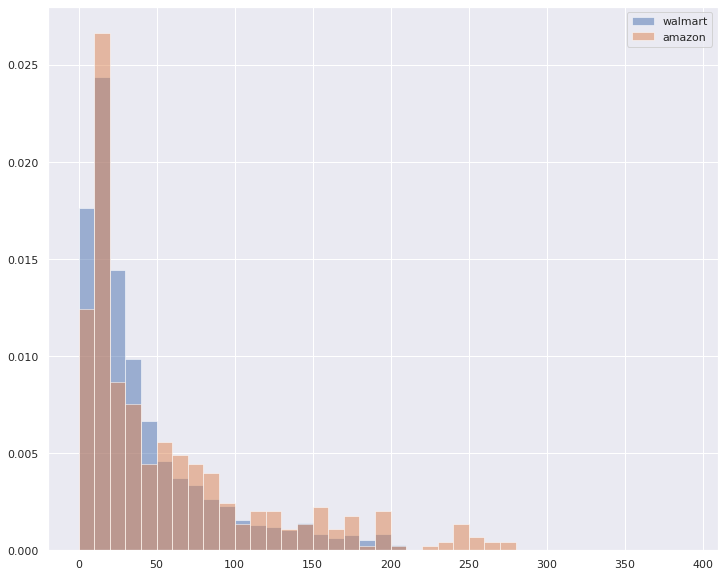

In [66]:
plt.figure(figsize=(12, 10))
plt.hist(walmart[walmart['Universal Category'] == 'Sports & Outdoors']['Sale Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='walmart')
plt.hist(amazon[amazon['Universal Category'] == 'Sports & Outdoors']['Selling Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='amazon')
plt.legend()
plt.show()

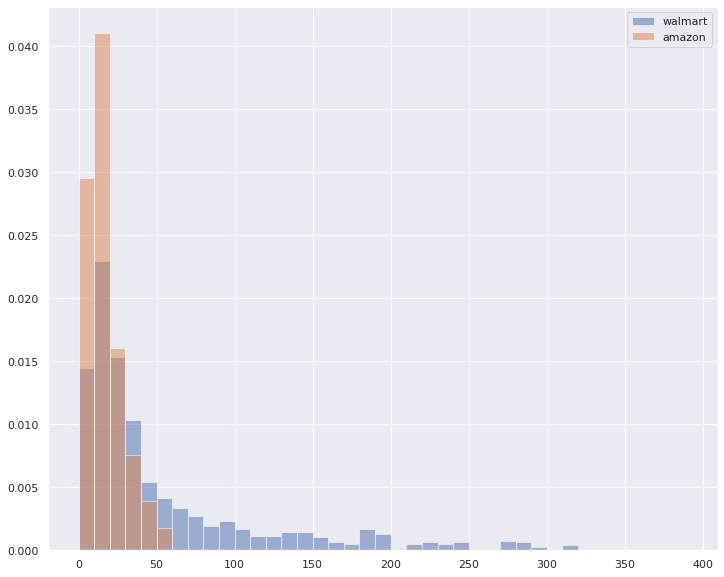

In [67]:
plt.figure(figsize=(12, 10))
plt.hist(walmart[walmart['Universal Category'] == 'Toys']['Sale Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='walmart')
plt.hist(amazon[amazon['Universal Category'] == 'Toys']['Selling Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='amazon')
plt.legend()
plt.show()

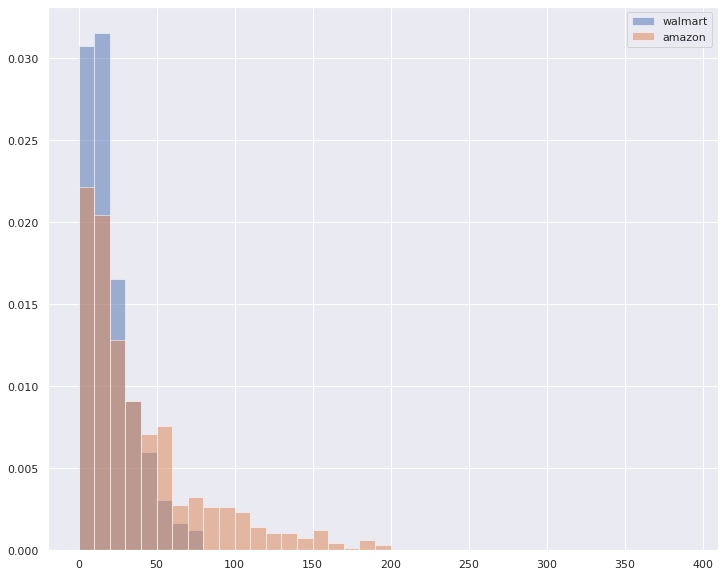

In [68]:
plt.figure(figsize=(12, 10))
plt.hist(walmart[walmart['Universal Category'] == 'Health & Household']['Sale Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='walmart')
plt.hist(amazon[amazon['Universal Category'] == 'Health & Household']['Selling Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='amazon')
plt.legend()
plt.show()

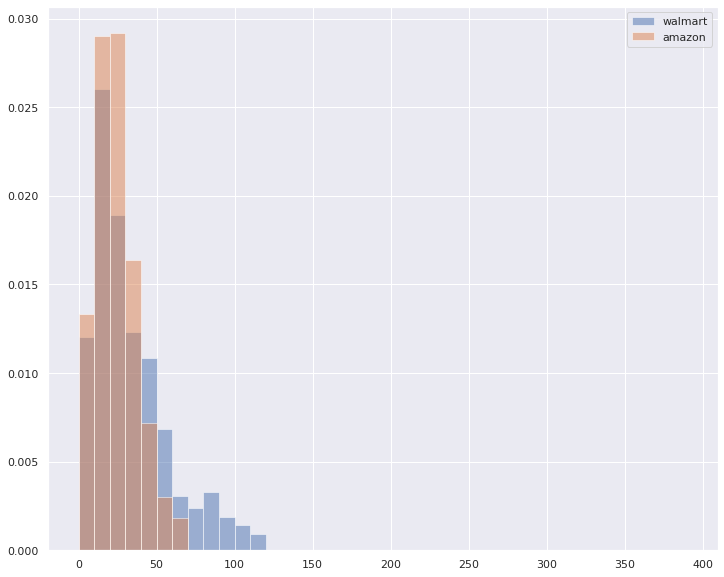

In [69]:
plt.figure(figsize=(12, 10))
plt.hist(walmart[walmart['Universal Category'] == 'Clothing, Shoes & Jewelry']['Sale Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='walmart')
plt.hist(amazon[amazon['Universal Category'] == 'Clothing, Shoes & Jewelry']['Selling Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='amazon')
plt.legend()
plt.show()

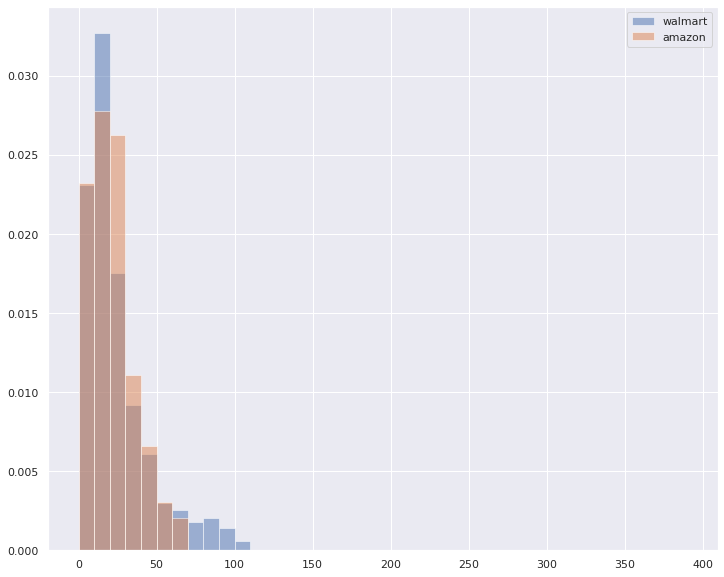

In [70]:
plt.figure(figsize=(12, 10))
plt.hist(walmart[walmart['Universal Category'] == 'Baby']['Sale Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='walmart')
plt.hist(amazon[amazon['Universal Category'] == 'Baby']['Selling Price'], density=True, bins = np.arange(0, 400, 10), alpha=0.5, label='amazon')
plt.legend()
plt.show()

In [56]:
from scipy.stats import ks_2samp

def perform_ks(category, alternative='two_sided'):   
    walmart_prices = walmart[walmart['Universal Category'] == category]['Sale Price']
    amazon_prices = amazon[amazon['Universal Category'] == category]['Selling Price']
    
    print(f'Median Walmart Price For {category}: {walmart_prices.median()}')
    print(f'Median Amazon Price For {category}: {amazon_prices.median()}')
    print()
    generate_cdf(walmart_prices, amazon_prices)
    
    res = ks_2samp(walmart_prices, amazon_prices, alternative=alternative)
    
    print(f'Test Stat: {res[0]}')
    print(f'P-value: {res[1]}')
    
    return res

In [57]:
def plot_qq(category):
    walmart_prices = walmart[walmart['Universal Category'] == category]['Sale Price']
    amazon_prices = amazon[amazon['Universal Category'] == category]['Selling Price']
    
    standardized_wp = (walmart_prices - walmart_prices.mean()) / walmart_prices.std()
    standardized_ap = (amazon_prices - amazon_prices.mean()) / amazon_prices.std()
    
    fig, axs = plt.subplots(2, figsize=(10, 15))
    sm.qqplot(standardized_wp, line='s', ax=axs[0])
    axs[0].set_title(f'Walmart QQPlot for {category}')
    sm.qqplot(standardized_ap, line='s', ax=axs[1])
    axs[1].set_title(f'Amazon QQPlot for {category}')

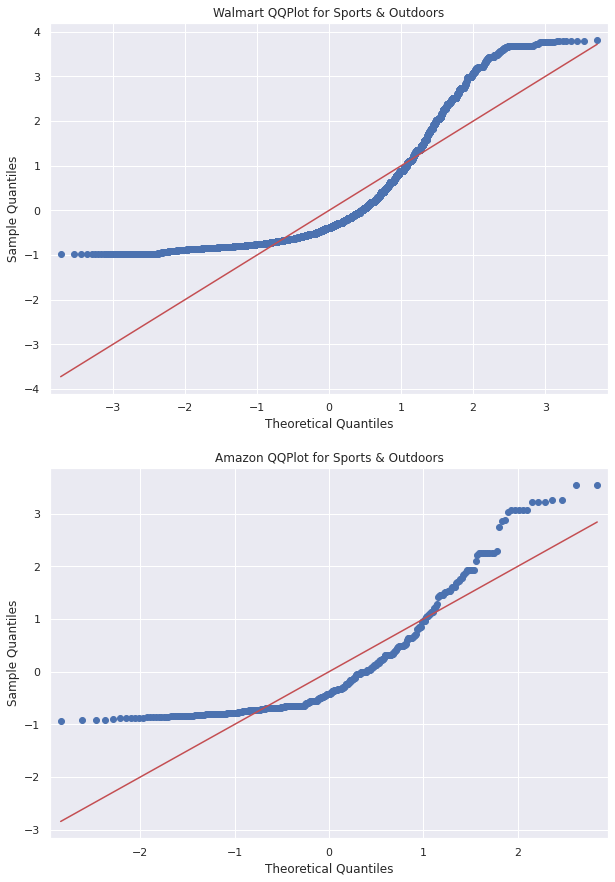

In [58]:
plot_qq(category='Sports & Outdoors')

Median Walmart Price For Sports & Outdoors: 25.0
Median Amazon Price For Sports & Outdoors: 34.167500000000004

Test Stat: 0.14451717412145848
P-value: 1.3862139293192314e-08


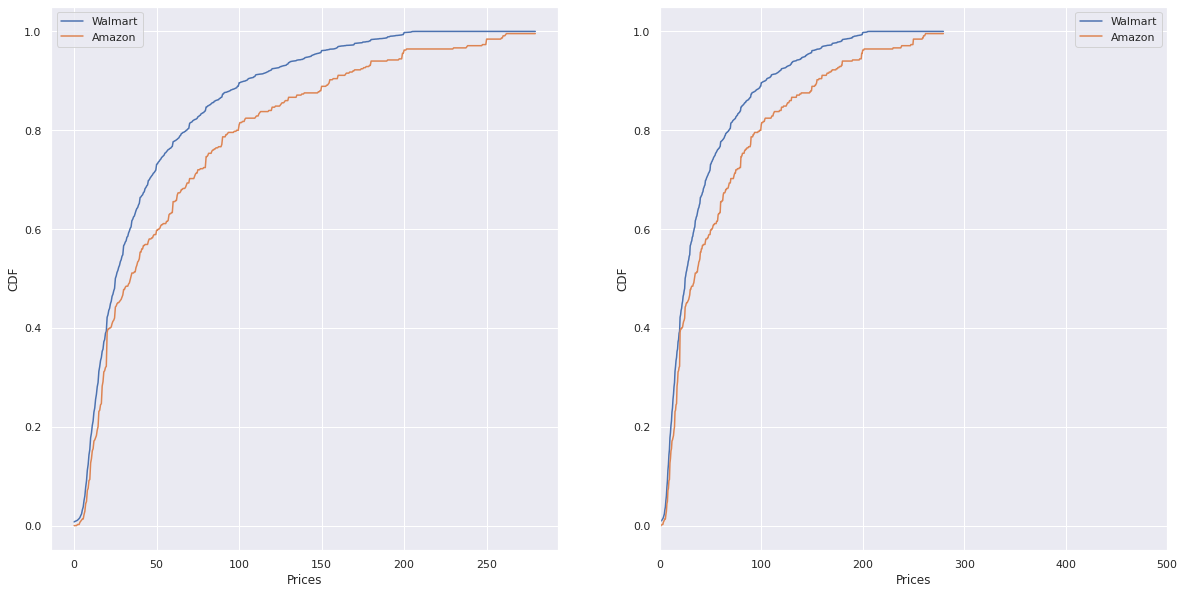

In [59]:
res = perform_ks('Sports & Outdoors', alternative='greater')

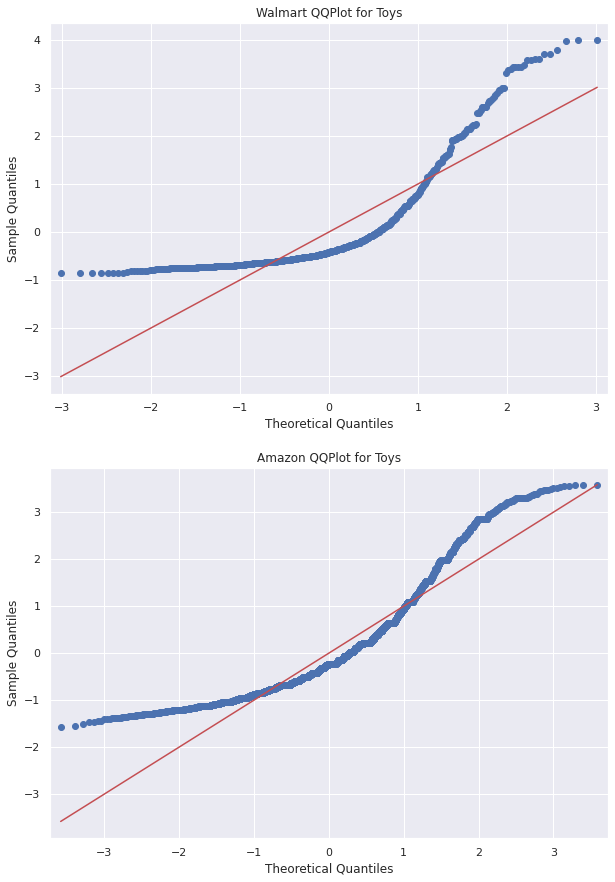

In [60]:
plot_qq('Toys')

Median Walmart Price For Toys: 28.32
Median Amazon Price For Toys: 14.98

Test Stat: 0.3431026724908464
P-value: 7.48352278464514e-71


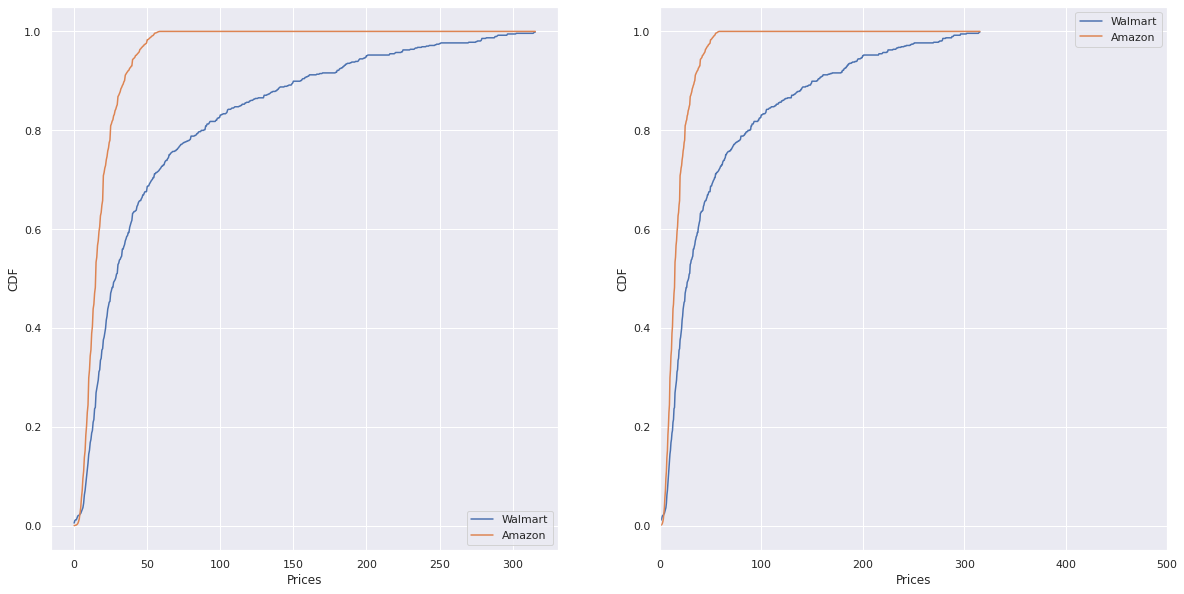

In [61]:
res = perform_ks('Toys', alternative='less')

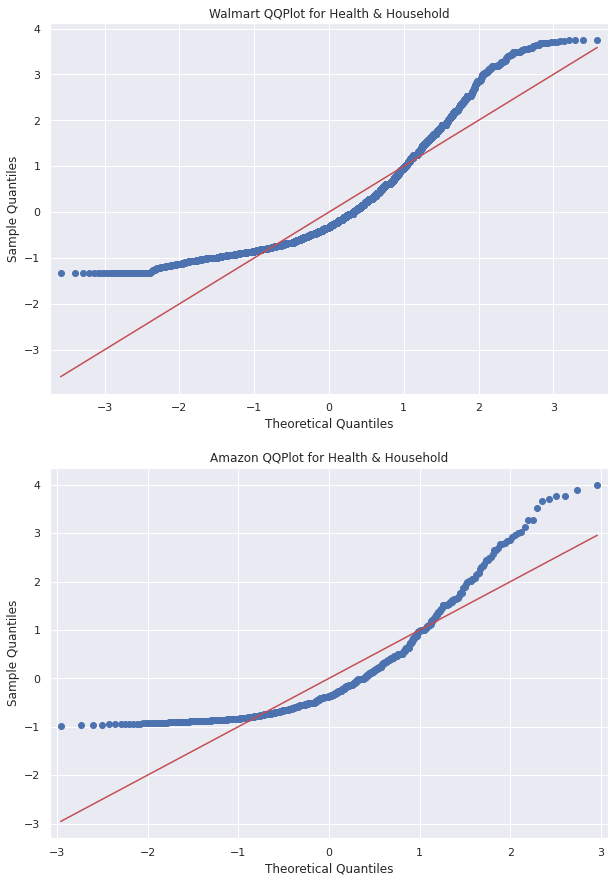

In [62]:
plot_qq("Health & Household")

Median Walmart Price For Health & Household: 15.4
Median Amazon Price For Health & Household: 25.81

Test Stat: 0.2502064760200433
P-value: 1.6538623783388612e-32


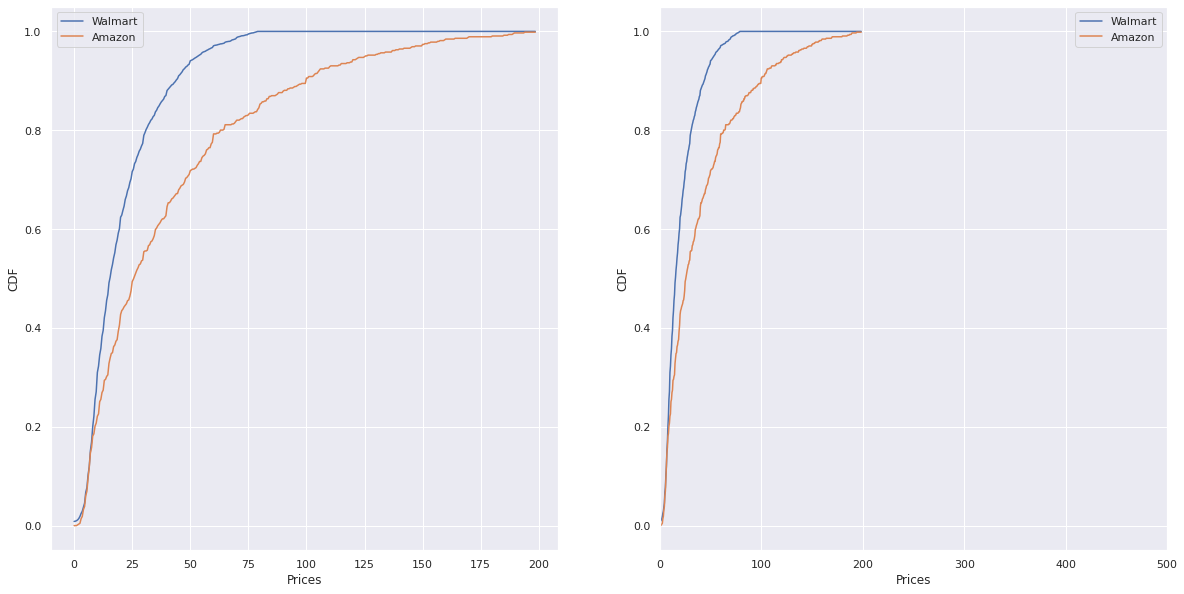

In [63]:
res = perform_ks('Health & Household', alternative='greater')

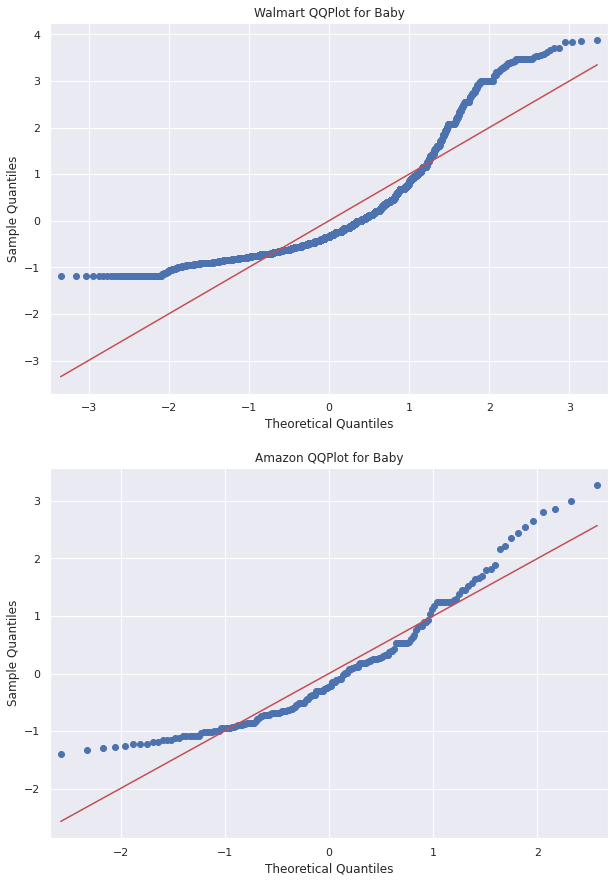

In [64]:
plot_qq('Baby')

Median Walmart Price For Baby: 17.99
Median Amazon Price For Baby: 19.085

Test Stat: 0.07205195275227849
P-value: 0.28272765197719707


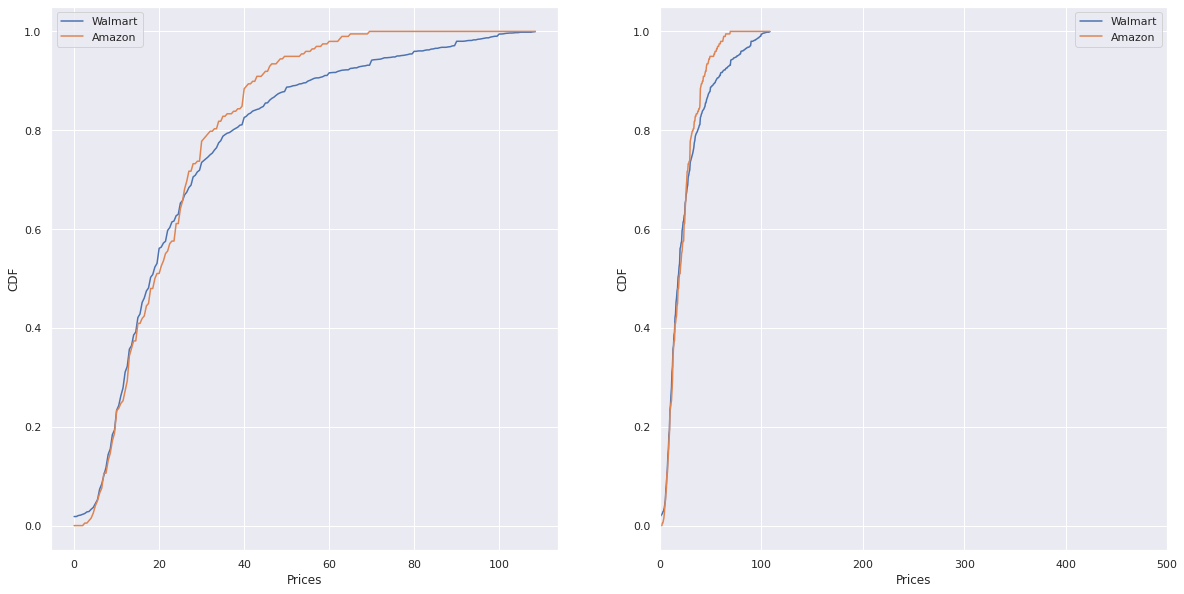

In [65]:
res = perform_ks('Baby', alternative='two-sided')